## OPTICAL CHARACTER RECOGNITION USING SSD

In [1]:
import ipywidgets as widgets
import os
import sys
import skimage.io
import scipy
import json

In [2]:
with open('json_config.json') as f:
    json_conf = json.load(f)

In [4]:

ROOT_DIR = os.path.abspath(json_conf['ssd_folder']) # add here mask RCNN path
sys.path.append(ROOT_DIR)

import cv2
from utils_ssd import *
import pandas as pd
from PIL import Image

from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%` not found.


In [5]:
data_folder = json_conf['data_folder']
print(data_folder)

/home/predator/Documents/OCR/OCR/extra/


### SVHN parsing

In [6]:
def read_process_h5(filename):
    """ Reads and processes the mat files provided in the SVHN dataset. 
        Input: filename 
        Ouptut: list of python dictionaries 
    """ 
        
    f = h5py.File(filename, 'r')
    groups = list(f['digitStruct'].items())
    bbox_ds = np.array(groups[0][1]).squeeze()
    names_ds = np.array(groups[1][1]).squeeze()

    data_list = []
    num_files = bbox_ds.shape[0]
    count = 0

    for objref1, objref2 in zip(bbox_ds[:10000], names_ds[:10000]):

        data_dict = {}

        # Extract image name
        names_ds = np.array(f[objref2]).squeeze()
        filename = ''.join(chr(x) for x in names_ds)
        data_dict['filename'] = filename

        #print filename

        # Extract other properties
        items1 = list(f[objref1].items())

        # Extract image label
        labels_ds = np.array(items1[1][1]).squeeze()
        try:
            label_vals = [int(f[ref][:][0, 0]) for ref in labels_ds]
        except TypeError:
            label_vals = [labels_ds]
        data_dict['labels'] = label_vals
        data_dict['length'] = len(label_vals)

        # Extract image height
        height_ds = np.array(items1[0][1]).squeeze()
        try:
            height_vals = [f[ref][:][0, 0] for ref in height_ds]
        except TypeError:
            height_vals = [height_ds]
        data_dict['height'] = height_vals

        # Extract image left coords
        left_ds = np.array(items1[2][1]).squeeze()
        try:
            left_vals = [f[ref][:][0, 0] for ref in left_ds]
        except TypeError:
            left_vals = [left_ds]
        data_dict['left'] = left_vals

        # Extract image top coords
        top_ds = np.array(items1[3][1]).squeeze()
        try:
            top_vals = [f[ref][:][0, 0] for ref in top_ds]
        except TypeError:
            top_vals = [top_ds]
        data_dict['top'] = top_vals

        # Extract image width
        width_ds = np.array(items1[4][1]).squeeze()
        try:
            width_vals = [f[ref][:][0, 0] for ref in width_ds]
        except TypeError:
            width_vals = [width_ds]
        data_dict['width'] = width_vals

        data_list.append(data_dict)

        count += 1
        print ('Processed: %d/%d' % (count, num_files))

    return data_list

def json_to_pascal(json, filename):
    # convert json to pascal and save as csv
    pascal_list = []
    for i in json:
        for j in range(len(i['labels'])):
            pascal_list.append({'class_id': int(i['labels'][j]),'fname': i['filename'] 
            ,'xmax': int(i['left'][j]+i['width'][j]), 'xmin': int(i['left'][j])
            ,'ymax': int(i['top'][j]+i['height'][j]),'ymin': int(i['top'][j]) 
            })
    df_pascal = pd.DataFrame(pascal_list,dtype='str')
    df_pascal.to_csv(filename,index=False)

In [7]:
file_path = data_folder+'digitStruct.mat'

In [8]:
p  = read_process_h5(file_path)

Processed: 1/202353
Processed: 2/202353
Processed: 3/202353
Processed: 4/202353
Processed: 5/202353
Processed: 6/202353
Processed: 7/202353
Processed: 8/202353
Processed: 9/202353
Processed: 10/202353
Processed: 11/202353
Processed: 12/202353
Processed: 13/202353
Processed: 14/202353
Processed: 15/202353
Processed: 16/202353
Processed: 17/202353
Processed: 18/202353
Processed: 19/202353
Processed: 20/202353
Processed: 21/202353
Processed: 22/202353
Processed: 23/202353
Processed: 24/202353
Processed: 25/202353
Processed: 26/202353
Processed: 27/202353
Processed: 28/202353
Processed: 29/202353
Processed: 30/202353
Processed: 31/202353
Processed: 32/202353
Processed: 33/202353
Processed: 34/202353
Processed: 35/202353
Processed: 36/202353
Processed: 37/202353
Processed: 38/202353
Processed: 39/202353
Processed: 40/202353
Processed: 41/202353
Processed: 42/202353
Processed: 43/202353
Processed: 44/202353
Processed: 45/202353
Processed: 46/202353
Processed: 47/202353
Processed: 48/202353
P

Processed: 563/202353
Processed: 564/202353
Processed: 565/202353
Processed: 566/202353
Processed: 567/202353
Processed: 568/202353
Processed: 569/202353
Processed: 570/202353
Processed: 571/202353
Processed: 572/202353
Processed: 573/202353
Processed: 574/202353
Processed: 575/202353
Processed: 576/202353
Processed: 577/202353
Processed: 578/202353
Processed: 579/202353
Processed: 580/202353
Processed: 581/202353
Processed: 582/202353
Processed: 583/202353
Processed: 584/202353
Processed: 585/202353
Processed: 586/202353
Processed: 587/202353
Processed: 588/202353
Processed: 589/202353
Processed: 590/202353
Processed: 591/202353
Processed: 592/202353
Processed: 593/202353
Processed: 594/202353
Processed: 595/202353
Processed: 596/202353
Processed: 597/202353
Processed: 598/202353
Processed: 599/202353
Processed: 600/202353
Processed: 601/202353
Processed: 602/202353
Processed: 603/202353
Processed: 604/202353
Processed: 605/202353
Processed: 606/202353
Processed: 607/202353
Processed:

Processed: 939/202353
Processed: 940/202353
Processed: 941/202353
Processed: 942/202353
Processed: 943/202353
Processed: 944/202353
Processed: 945/202353
Processed: 946/202353
Processed: 947/202353
Processed: 948/202353
Processed: 949/202353
Processed: 950/202353
Processed: 951/202353
Processed: 952/202353
Processed: 953/202353
Processed: 954/202353
Processed: 955/202353
Processed: 956/202353
Processed: 957/202353
Processed: 958/202353
Processed: 959/202353
Processed: 960/202353
Processed: 961/202353
Processed: 962/202353
Processed: 963/202353
Processed: 964/202353
Processed: 965/202353
Processed: 966/202353
Processed: 967/202353
Processed: 968/202353
Processed: 969/202353
Processed: 970/202353
Processed: 971/202353
Processed: 972/202353
Processed: 973/202353
Processed: 974/202353
Processed: 975/202353
Processed: 976/202353
Processed: 977/202353
Processed: 978/202353
Processed: 979/202353
Processed: 980/202353
Processed: 981/202353
Processed: 982/202353
Processed: 983/202353
Processed:

Processed: 1438/202353
Processed: 1439/202353
Processed: 1440/202353
Processed: 1441/202353
Processed: 1442/202353
Processed: 1443/202353
Processed: 1444/202353
Processed: 1445/202353
Processed: 1446/202353
Processed: 1447/202353
Processed: 1448/202353
Processed: 1449/202353
Processed: 1450/202353
Processed: 1451/202353
Processed: 1452/202353
Processed: 1453/202353
Processed: 1454/202353
Processed: 1455/202353
Processed: 1456/202353
Processed: 1457/202353
Processed: 1458/202353
Processed: 1459/202353
Processed: 1460/202353
Processed: 1461/202353
Processed: 1462/202353
Processed: 1463/202353
Processed: 1464/202353
Processed: 1465/202353
Processed: 1466/202353
Processed: 1467/202353
Processed: 1468/202353
Processed: 1469/202353
Processed: 1470/202353
Processed: 1471/202353
Processed: 1472/202353
Processed: 1473/202353
Processed: 1474/202353
Processed: 1475/202353
Processed: 1476/202353
Processed: 1477/202353
Processed: 1478/202353
Processed: 1479/202353
Processed: 1480/202353
Processed: 

Processed: 1821/202353
Processed: 1822/202353
Processed: 1823/202353
Processed: 1824/202353
Processed: 1825/202353
Processed: 1826/202353
Processed: 1827/202353
Processed: 1828/202353
Processed: 1829/202353
Processed: 1830/202353
Processed: 1831/202353
Processed: 1832/202353
Processed: 1833/202353
Processed: 1834/202353
Processed: 1835/202353
Processed: 1836/202353
Processed: 1837/202353
Processed: 1838/202353
Processed: 1839/202353
Processed: 1840/202353
Processed: 1841/202353
Processed: 1842/202353
Processed: 1843/202353
Processed: 1844/202353
Processed: 1845/202353
Processed: 1846/202353
Processed: 1847/202353
Processed: 1848/202353
Processed: 1849/202353
Processed: 1850/202353
Processed: 1851/202353
Processed: 1852/202353
Processed: 1853/202353
Processed: 1854/202353
Processed: 1855/202353
Processed: 1856/202353
Processed: 1857/202353
Processed: 1858/202353
Processed: 1859/202353
Processed: 1860/202353
Processed: 1861/202353
Processed: 1862/202353
Processed: 1863/202353
Processed: 

Processed: 2321/202353
Processed: 2322/202353
Processed: 2323/202353
Processed: 2324/202353
Processed: 2325/202353
Processed: 2326/202353
Processed: 2327/202353
Processed: 2328/202353
Processed: 2329/202353
Processed: 2330/202353
Processed: 2331/202353
Processed: 2332/202353
Processed: 2333/202353
Processed: 2334/202353
Processed: 2335/202353
Processed: 2336/202353
Processed: 2337/202353
Processed: 2338/202353
Processed: 2339/202353
Processed: 2340/202353
Processed: 2341/202353
Processed: 2342/202353
Processed: 2343/202353
Processed: 2344/202353
Processed: 2345/202353
Processed: 2346/202353
Processed: 2347/202353
Processed: 2348/202353
Processed: 2349/202353
Processed: 2350/202353
Processed: 2351/202353
Processed: 2352/202353
Processed: 2353/202353
Processed: 2354/202353
Processed: 2355/202353
Processed: 2356/202353
Processed: 2357/202353
Processed: 2358/202353
Processed: 2359/202353
Processed: 2360/202353
Processed: 2361/202353
Processed: 2362/202353
Processed: 2363/202353
Processed: 

Processed: 2706/202353
Processed: 2707/202353
Processed: 2708/202353
Processed: 2709/202353
Processed: 2710/202353
Processed: 2711/202353
Processed: 2712/202353
Processed: 2713/202353
Processed: 2714/202353
Processed: 2715/202353
Processed: 2716/202353
Processed: 2717/202353
Processed: 2718/202353
Processed: 2719/202353
Processed: 2720/202353
Processed: 2721/202353
Processed: 2722/202353
Processed: 2723/202353
Processed: 2724/202353
Processed: 2725/202353
Processed: 2726/202353
Processed: 2727/202353
Processed: 2728/202353
Processed: 2729/202353
Processed: 2730/202353
Processed: 2731/202353
Processed: 2732/202353
Processed: 2733/202353
Processed: 2734/202353
Processed: 2735/202353
Processed: 2736/202353
Processed: 2737/202353
Processed: 2738/202353
Processed: 2739/202353
Processed: 2740/202353
Processed: 2741/202353
Processed: 2742/202353
Processed: 2743/202353
Processed: 2744/202353
Processed: 2745/202353
Processed: 2746/202353
Processed: 2747/202353
Processed: 2748/202353
Processed: 

Processed: 3186/202353
Processed: 3187/202353
Processed: 3188/202353
Processed: 3189/202353
Processed: 3190/202353
Processed: 3191/202353
Processed: 3192/202353
Processed: 3193/202353
Processed: 3194/202353
Processed: 3195/202353
Processed: 3196/202353
Processed: 3197/202353
Processed: 3198/202353
Processed: 3199/202353
Processed: 3200/202353
Processed: 3201/202353
Processed: 3202/202353
Processed: 3203/202353
Processed: 3204/202353
Processed: 3205/202353
Processed: 3206/202353
Processed: 3207/202353
Processed: 3208/202353
Processed: 3209/202353
Processed: 3210/202353
Processed: 3211/202353
Processed: 3212/202353
Processed: 3213/202353
Processed: 3214/202353
Processed: 3215/202353
Processed: 3216/202353
Processed: 3217/202353
Processed: 3218/202353
Processed: 3219/202353
Processed: 3220/202353
Processed: 3221/202353
Processed: 3222/202353
Processed: 3223/202353
Processed: 3224/202353
Processed: 3225/202353
Processed: 3226/202353
Processed: 3227/202353
Processed: 3228/202353
Processed: 

Processed: 3761/202353
Processed: 3762/202353
Processed: 3763/202353
Processed: 3764/202353
Processed: 3765/202353
Processed: 3766/202353
Processed: 3767/202353
Processed: 3768/202353
Processed: 3769/202353
Processed: 3770/202353
Processed: 3771/202353
Processed: 3772/202353
Processed: 3773/202353
Processed: 3774/202353
Processed: 3775/202353
Processed: 3776/202353
Processed: 3777/202353
Processed: 3778/202353
Processed: 3779/202353
Processed: 3780/202353
Processed: 3781/202353
Processed: 3782/202353
Processed: 3783/202353
Processed: 3784/202353
Processed: 3785/202353
Processed: 3786/202353
Processed: 3787/202353
Processed: 3788/202353
Processed: 3789/202353
Processed: 3790/202353
Processed: 3791/202353
Processed: 3792/202353
Processed: 3793/202353
Processed: 3794/202353
Processed: 3795/202353
Processed: 3796/202353
Processed: 3797/202353
Processed: 3798/202353
Processed: 3799/202353
Processed: 3800/202353
Processed: 3801/202353
Processed: 3802/202353
Processed: 3803/202353
Processed: 

Processed: 4231/202353
Processed: 4232/202353
Processed: 4233/202353
Processed: 4234/202353
Processed: 4235/202353
Processed: 4236/202353
Processed: 4237/202353
Processed: 4238/202353
Processed: 4239/202353
Processed: 4240/202353
Processed: 4241/202353
Processed: 4242/202353
Processed: 4243/202353
Processed: 4244/202353
Processed: 4245/202353
Processed: 4246/202353
Processed: 4247/202353
Processed: 4248/202353
Processed: 4249/202353
Processed: 4250/202353
Processed: 4251/202353
Processed: 4252/202353
Processed: 4253/202353
Processed: 4254/202353
Processed: 4255/202353
Processed: 4256/202353
Processed: 4257/202353
Processed: 4258/202353
Processed: 4259/202353
Processed: 4260/202353
Processed: 4261/202353
Processed: 4262/202353
Processed: 4263/202353
Processed: 4264/202353
Processed: 4265/202353
Processed: 4266/202353
Processed: 4267/202353
Processed: 4268/202353
Processed: 4269/202353
Processed: 4270/202353
Processed: 4271/202353
Processed: 4272/202353
Processed: 4273/202353
Processed: 

Processed: 4636/202353
Processed: 4637/202353
Processed: 4638/202353
Processed: 4639/202353
Processed: 4640/202353
Processed: 4641/202353
Processed: 4642/202353
Processed: 4643/202353
Processed: 4644/202353
Processed: 4645/202353
Processed: 4646/202353
Processed: 4647/202353
Processed: 4648/202353
Processed: 4649/202353
Processed: 4650/202353
Processed: 4651/202353
Processed: 4652/202353
Processed: 4653/202353
Processed: 4654/202353
Processed: 4655/202353
Processed: 4656/202353
Processed: 4657/202353
Processed: 4658/202353
Processed: 4659/202353
Processed: 4660/202353
Processed: 4661/202353
Processed: 4662/202353
Processed: 4663/202353
Processed: 4664/202353
Processed: 4665/202353
Processed: 4666/202353
Processed: 4667/202353
Processed: 4668/202353
Processed: 4669/202353
Processed: 4670/202353
Processed: 4671/202353
Processed: 4672/202353
Processed: 4673/202353
Processed: 4674/202353
Processed: 4675/202353
Processed: 4676/202353
Processed: 4677/202353
Processed: 4678/202353
Processed: 

Processed: 5003/202353
Processed: 5004/202353
Processed: 5005/202353
Processed: 5006/202353
Processed: 5007/202353
Processed: 5008/202353
Processed: 5009/202353
Processed: 5010/202353
Processed: 5011/202353
Processed: 5012/202353
Processed: 5013/202353
Processed: 5014/202353
Processed: 5015/202353
Processed: 5016/202353
Processed: 5017/202353
Processed: 5018/202353
Processed: 5019/202353
Processed: 5020/202353
Processed: 5021/202353
Processed: 5022/202353
Processed: 5023/202353
Processed: 5024/202353
Processed: 5025/202353
Processed: 5026/202353
Processed: 5027/202353
Processed: 5028/202353
Processed: 5029/202353
Processed: 5030/202353
Processed: 5031/202353
Processed: 5032/202353
Processed: 5033/202353
Processed: 5034/202353
Processed: 5035/202353
Processed: 5036/202353
Processed: 5037/202353
Processed: 5038/202353
Processed: 5039/202353
Processed: 5040/202353
Processed: 5041/202353
Processed: 5042/202353
Processed: 5043/202353
Processed: 5044/202353
Processed: 5045/202353
Processed: 

Processed: 5490/202353
Processed: 5491/202353
Processed: 5492/202353
Processed: 5493/202353
Processed: 5494/202353
Processed: 5495/202353
Processed: 5496/202353
Processed: 5497/202353
Processed: 5498/202353
Processed: 5499/202353
Processed: 5500/202353
Processed: 5501/202353
Processed: 5502/202353
Processed: 5503/202353
Processed: 5504/202353
Processed: 5505/202353
Processed: 5506/202353
Processed: 5507/202353
Processed: 5508/202353
Processed: 5509/202353
Processed: 5510/202353
Processed: 5511/202353
Processed: 5512/202353
Processed: 5513/202353
Processed: 5514/202353
Processed: 5515/202353
Processed: 5516/202353
Processed: 5517/202353
Processed: 5518/202353
Processed: 5519/202353
Processed: 5520/202353
Processed: 5521/202353
Processed: 5522/202353
Processed: 5523/202353
Processed: 5524/202353
Processed: 5525/202353
Processed: 5526/202353
Processed: 5527/202353
Processed: 5528/202353
Processed: 5529/202353
Processed: 5530/202353
Processed: 5531/202353
Processed: 5532/202353
Processed: 

Processed: 5926/202353
Processed: 5927/202353
Processed: 5928/202353
Processed: 5929/202353
Processed: 5930/202353
Processed: 5931/202353
Processed: 5932/202353
Processed: 5933/202353
Processed: 5934/202353
Processed: 5935/202353
Processed: 5936/202353
Processed: 5937/202353
Processed: 5938/202353
Processed: 5939/202353
Processed: 5940/202353
Processed: 5941/202353
Processed: 5942/202353
Processed: 5943/202353
Processed: 5944/202353
Processed: 5945/202353
Processed: 5946/202353
Processed: 5947/202353
Processed: 5948/202353
Processed: 5949/202353
Processed: 5950/202353
Processed: 5951/202353
Processed: 5952/202353
Processed: 5953/202353
Processed: 5954/202353
Processed: 5955/202353
Processed: 5956/202353
Processed: 5957/202353
Processed: 5958/202353
Processed: 5959/202353
Processed: 5960/202353
Processed: 5961/202353
Processed: 5962/202353
Processed: 5963/202353
Processed: 5964/202353
Processed: 5965/202353
Processed: 5966/202353
Processed: 5967/202353
Processed: 5968/202353
Processed: 

Processed: 6402/202353
Processed: 6403/202353
Processed: 6404/202353
Processed: 6405/202353
Processed: 6406/202353
Processed: 6407/202353
Processed: 6408/202353
Processed: 6409/202353
Processed: 6410/202353
Processed: 6411/202353
Processed: 6412/202353
Processed: 6413/202353
Processed: 6414/202353
Processed: 6415/202353
Processed: 6416/202353
Processed: 6417/202353
Processed: 6418/202353
Processed: 6419/202353
Processed: 6420/202353
Processed: 6421/202353
Processed: 6422/202353
Processed: 6423/202353
Processed: 6424/202353
Processed: 6425/202353
Processed: 6426/202353
Processed: 6427/202353
Processed: 6428/202353
Processed: 6429/202353
Processed: 6430/202353
Processed: 6431/202353
Processed: 6432/202353
Processed: 6433/202353
Processed: 6434/202353
Processed: 6435/202353
Processed: 6436/202353
Processed: 6437/202353
Processed: 6438/202353
Processed: 6439/202353
Processed: 6440/202353
Processed: 6441/202353
Processed: 6442/202353
Processed: 6443/202353
Processed: 6444/202353
Processed: 

Processed: 6764/202353
Processed: 6765/202353
Processed: 6766/202353
Processed: 6767/202353
Processed: 6768/202353
Processed: 6769/202353
Processed: 6770/202353
Processed: 6771/202353
Processed: 6772/202353
Processed: 6773/202353
Processed: 6774/202353
Processed: 6775/202353
Processed: 6776/202353
Processed: 6777/202353
Processed: 6778/202353
Processed: 6779/202353
Processed: 6780/202353
Processed: 6781/202353
Processed: 6782/202353
Processed: 6783/202353
Processed: 6784/202353
Processed: 6785/202353
Processed: 6786/202353
Processed: 6787/202353
Processed: 6788/202353
Processed: 6789/202353
Processed: 6790/202353
Processed: 6791/202353
Processed: 6792/202353
Processed: 6793/202353
Processed: 6794/202353
Processed: 6795/202353
Processed: 6796/202353
Processed: 6797/202353
Processed: 6798/202353
Processed: 6799/202353
Processed: 6800/202353
Processed: 6801/202353
Processed: 6802/202353
Processed: 6803/202353
Processed: 6804/202353
Processed: 6805/202353
Processed: 6806/202353
Processed: 

Processed: 7199/202353
Processed: 7200/202353
Processed: 7201/202353
Processed: 7202/202353
Processed: 7203/202353
Processed: 7204/202353
Processed: 7205/202353
Processed: 7206/202353
Processed: 7207/202353
Processed: 7208/202353
Processed: 7209/202353
Processed: 7210/202353
Processed: 7211/202353
Processed: 7212/202353
Processed: 7213/202353
Processed: 7214/202353
Processed: 7215/202353
Processed: 7216/202353
Processed: 7217/202353
Processed: 7218/202353
Processed: 7219/202353
Processed: 7220/202353
Processed: 7221/202353
Processed: 7222/202353
Processed: 7223/202353
Processed: 7224/202353
Processed: 7225/202353
Processed: 7226/202353
Processed: 7227/202353
Processed: 7228/202353
Processed: 7229/202353
Processed: 7230/202353
Processed: 7231/202353
Processed: 7232/202353
Processed: 7233/202353
Processed: 7234/202353
Processed: 7235/202353
Processed: 7236/202353
Processed: 7237/202353
Processed: 7238/202353
Processed: 7239/202353
Processed: 7240/202353
Processed: 7241/202353
Processed: 

Processed: 7608/202353
Processed: 7609/202353
Processed: 7610/202353
Processed: 7611/202353
Processed: 7612/202353
Processed: 7613/202353
Processed: 7614/202353
Processed: 7615/202353
Processed: 7616/202353
Processed: 7617/202353
Processed: 7618/202353
Processed: 7619/202353
Processed: 7620/202353
Processed: 7621/202353
Processed: 7622/202353
Processed: 7623/202353
Processed: 7624/202353
Processed: 7625/202353
Processed: 7626/202353
Processed: 7627/202353
Processed: 7628/202353
Processed: 7629/202353
Processed: 7630/202353
Processed: 7631/202353
Processed: 7632/202353
Processed: 7633/202353
Processed: 7634/202353
Processed: 7635/202353
Processed: 7636/202353
Processed: 7637/202353
Processed: 7638/202353
Processed: 7639/202353
Processed: 7640/202353
Processed: 7641/202353
Processed: 7642/202353
Processed: 7643/202353
Processed: 7644/202353
Processed: 7645/202353
Processed: 7646/202353
Processed: 7647/202353
Processed: 7648/202353
Processed: 7649/202353
Processed: 7650/202353
Processed: 

Processed: 8036/202353
Processed: 8037/202353
Processed: 8038/202353
Processed: 8039/202353
Processed: 8040/202353
Processed: 8041/202353
Processed: 8042/202353
Processed: 8043/202353
Processed: 8044/202353
Processed: 8045/202353
Processed: 8046/202353
Processed: 8047/202353
Processed: 8048/202353
Processed: 8049/202353
Processed: 8050/202353
Processed: 8051/202353
Processed: 8052/202353
Processed: 8053/202353
Processed: 8054/202353
Processed: 8055/202353
Processed: 8056/202353
Processed: 8057/202353
Processed: 8058/202353
Processed: 8059/202353
Processed: 8060/202353
Processed: 8061/202353
Processed: 8062/202353
Processed: 8063/202353
Processed: 8064/202353
Processed: 8065/202353
Processed: 8066/202353
Processed: 8067/202353
Processed: 8068/202353
Processed: 8069/202353
Processed: 8070/202353
Processed: 8071/202353
Processed: 8072/202353
Processed: 8073/202353
Processed: 8074/202353
Processed: 8075/202353
Processed: 8076/202353
Processed: 8077/202353
Processed: 8078/202353
Processed: 

Processed: 8434/202353
Processed: 8435/202353
Processed: 8436/202353
Processed: 8437/202353
Processed: 8438/202353
Processed: 8439/202353
Processed: 8440/202353
Processed: 8441/202353
Processed: 8442/202353
Processed: 8443/202353
Processed: 8444/202353
Processed: 8445/202353
Processed: 8446/202353
Processed: 8447/202353
Processed: 8448/202353
Processed: 8449/202353
Processed: 8450/202353
Processed: 8451/202353
Processed: 8452/202353
Processed: 8453/202353
Processed: 8454/202353
Processed: 8455/202353
Processed: 8456/202353
Processed: 8457/202353
Processed: 8458/202353
Processed: 8459/202353
Processed: 8460/202353
Processed: 8461/202353
Processed: 8462/202353
Processed: 8463/202353
Processed: 8464/202353
Processed: 8465/202353
Processed: 8466/202353
Processed: 8467/202353
Processed: 8468/202353
Processed: 8469/202353
Processed: 8470/202353
Processed: 8471/202353
Processed: 8472/202353
Processed: 8473/202353
Processed: 8474/202353
Processed: 8475/202353
Processed: 8476/202353
Processed: 

Processed: 8819/202353
Processed: 8820/202353
Processed: 8821/202353
Processed: 8822/202353
Processed: 8823/202353
Processed: 8824/202353
Processed: 8825/202353
Processed: 8826/202353
Processed: 8827/202353
Processed: 8828/202353
Processed: 8829/202353
Processed: 8830/202353
Processed: 8831/202353
Processed: 8832/202353
Processed: 8833/202353
Processed: 8834/202353
Processed: 8835/202353
Processed: 8836/202353
Processed: 8837/202353
Processed: 8838/202353
Processed: 8839/202353
Processed: 8840/202353
Processed: 8841/202353
Processed: 8842/202353
Processed: 8843/202353
Processed: 8844/202353
Processed: 8845/202353
Processed: 8846/202353
Processed: 8847/202353
Processed: 8848/202353
Processed: 8849/202353
Processed: 8850/202353
Processed: 8851/202353
Processed: 8852/202353
Processed: 8853/202353
Processed: 8854/202353
Processed: 8855/202353
Processed: 8856/202353
Processed: 8857/202353
Processed: 8858/202353
Processed: 8859/202353
Processed: 8860/202353
Processed: 8861/202353
Processed: 

Processed: 9455/202353
Processed: 9456/202353
Processed: 9457/202353
Processed: 9458/202353
Processed: 9459/202353
Processed: 9460/202353
Processed: 9461/202353
Processed: 9462/202353
Processed: 9463/202353
Processed: 9464/202353
Processed: 9465/202353
Processed: 9466/202353
Processed: 9467/202353
Processed: 9468/202353
Processed: 9469/202353
Processed: 9470/202353
Processed: 9471/202353
Processed: 9472/202353
Processed: 9473/202353
Processed: 9474/202353
Processed: 9475/202353
Processed: 9476/202353
Processed: 9477/202353
Processed: 9478/202353
Processed: 9479/202353
Processed: 9480/202353
Processed: 9481/202353
Processed: 9482/202353
Processed: 9483/202353
Processed: 9484/202353
Processed: 9485/202353
Processed: 9486/202353
Processed: 9487/202353
Processed: 9488/202353
Processed: 9489/202353
Processed: 9490/202353
Processed: 9491/202353
Processed: 9492/202353
Processed: 9493/202353
Processed: 9494/202353
Processed: 9495/202353
Processed: 9496/202353
Processed: 9497/202353
Processed: 

Processed: 9876/202353
Processed: 9877/202353
Processed: 9878/202353
Processed: 9879/202353
Processed: 9880/202353
Processed: 9881/202353
Processed: 9882/202353
Processed: 9883/202353
Processed: 9884/202353
Processed: 9885/202353
Processed: 9886/202353
Processed: 9887/202353
Processed: 9888/202353
Processed: 9889/202353
Processed: 9890/202353
Processed: 9891/202353
Processed: 9892/202353
Processed: 9893/202353
Processed: 9894/202353
Processed: 9895/202353
Processed: 9896/202353
Processed: 9897/202353
Processed: 9898/202353
Processed: 9899/202353
Processed: 9900/202353
Processed: 9901/202353
Processed: 9902/202353
Processed: 9903/202353
Processed: 9904/202353
Processed: 9905/202353
Processed: 9906/202353
Processed: 9907/202353
Processed: 9908/202353
Processed: 9909/202353
Processed: 9910/202353
Processed: 9911/202353
Processed: 9912/202353
Processed: 9913/202353
Processed: 9914/202353
Processed: 9915/202353
Processed: 9916/202353
Processed: 9917/202353
Processed: 9918/202353
Processed: 

In [5]:
json_to_pascal(p, data_folder+'pascal.csv')

NameError: name 'json_to_pascal' is not defined

## Load the trained weights file and make a copy

### Init model

In [8]:


task = 'svhn'

labels_path = f'{data_folder}pascal.csv'

input_format = ['class_id','image_name','xmax','xmin','ymax','ymin' ]
    
df = pd.read_csv(labels_path)


In [8]:
df.head()

,class_id,fname,xmax,xmin,ymax,ymin
0,4,1.png,62,24,126,70
1,7,1.png,91,55,97,41
2,8,1.png,126,79,79,23
3,7,2.png,126,32,216,13
4,1,2.png,181,143,236,33


In [9]:
# da wil be converted to the format 
'''
   class_id  fname  xmax  xmin  ymax  ymin
0         4  1.png    62    24   126    70
1         7  1.png    91    55    97    41
'''
#df1 = df.iloc[:,:5]
#df1.head()


'\n   class_id  fname  xmax  xmin  ymax  ymin\n0         4  1.png    62    24   126    70\n1         7  1.png    91    55    97    41\n'

In [30]:
#df2 = df.iloc[:,5:6]
#df2.head()

In [31]:
# merging the data
#df = pd.concat([df2,df1], axis=1)
#df.head()

###  Explore

In [9]:
def viz_random_image(df):
    file = np.random.choice(df.fname)
    im = skimage.io.imread(f'{data_folder}/{file}')
    annots =  df[df.fname==file].iterrows()

    plt.figure(figsize=(6,6))
    plt.imshow(im)

    current_axis = plt.gca()

    for box in annots:
        label = box[1]['class_id']
        current_axis.add_patch(plt.Rectangle(
            (box[1]['xmin'], box[1]['ymin']), box[1]['xmax']-box[1]['xmin'],
            box[1]['ymax']-box[1]['ymin'], color='blue', fill=False, linewidth=2))  
        current_axis.text(box[1]['xmin'], box[1]['ymin'], label, size='x-large', color='white', bbox={'facecolor':'blue', 'alpha':1.0})
    plt.show()    

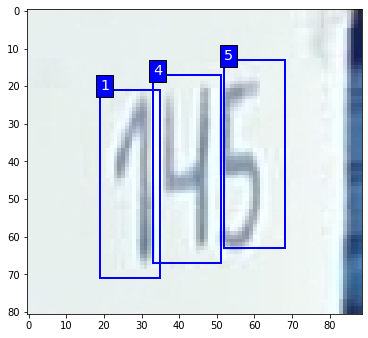

In [10]:
viz_random_image(df)

In [12]:
class SVHN_Config(Config):
    batch_size = 8
    
    dataset_folder = data_folder
    task = task
    
    labels_path = labels_path

    input_format = input_format

conf=SVHN_Config()

resize = Resize(height=conf.img_height, width=conf.img_width)
print(conf.img_height)
print(conf.img_width)
trans = [resize]

300
300


## esta parte carga  la configuracion basica del modelo train y test


In [13]:
# instance of the class setting of finetuning
learner = SSD_finetune(conf)

learner.get_data(create_subset=True)

# carga y configura todo lo necesario para el modelo ssd300 weights
# finalmente retorna string de file-path
weights_destination_path=learner.init_weights()

learner.get_model(mode='training', weights_path = weights_destination_path)
model = learner.model
learner.get_input_encoder()
ssd_input_encoder = learner.ssd_input_encoder

# Training schedule definitions
adam = Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) 
ssd_loss = SSDLoss(neg_pos_ratio=3, n_neg_min=0, alpha=1.0)
model.compile(optimizer=adam, loss=ssd_loss.compute_loss)


data loading and preperations
class_ids [ 0  1  2  3  4  5  6  7  8  9 10]  should be numeric
input format: ['class_id', 'image_name', 'xmax', 'xmin', 'ymax', 'ymin']
   class_id  fname  xmax  xmin  ymax  ymin
0         4  1.png    62    24   126    70
1         7  1.png    91    55    97    41
Create subset of 20 files in /home/predator/Documents/OCR/OCR/extra/small_pascal.csv
split to 8000  train files 2000  val files

loading weights
classes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
last layer indicies [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253]
Shape of the 'conv4_3_norm_mbox_conf' weights:

kernel:	 (3, 3, 512, 44)
bias:	 (44,)


/home/predator/anaconda3/envs/my_env/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Instructions for updating:
Colocations handled automatically by placer.
Loading weights from /home/predator/Documents/OCR/OCR/models/VGG_coco_SSD_300x300_iter_400000.h5_subsampled_11_classes.h5
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
created encoder with 10 classes


NameError: name 'subset_annotation_file' is not defined

### Data loaders From utils

In [14]:
train_annotation_file=f'{conf.dataset_folder}train_pascal.csv'
val_annotation_file=f'{conf.dataset_folder}val_pascal.csv'
subset_annotation_file=f'{conf.dataset_folder}small_pascal.csv'

print(train_annotation_file)

/home/predator/Documents/OCR/OCR/extra/train_pascal.csv


In [15]:
#print(ssd_input_encoder)
train_generator = learner.get_generator(conf.batch_size, trans=trans, anot_file=train_annotation_file,encoder=ssd_input_encoder)

val_generator = learner.get_generator(conf.batch_size,trans=trans, anot_file=val_annotation_file,
                 returns={'processed_images','encoded_labels'}, encoder=ssd_input_encoder,val=True)

test_generator = learner.get_generator(conf.batch_size, trans=trans, anot_file=subset_annotation_file,encoder=ssd_input_encoder)

images_dir:  /home/predator/Documents/OCR/OCR/extra/ labels_filename:  /home/predator/Documents/OCR/OCR/extra/train_pascal.csv
Loaded 8000 images, with [<data_generator.object_detection_2d_geometric_ops.Resize object at 0x7f59a45989b0>] transformations
images_dir:  /home/predator/Documents/OCR/OCR/extra/ labels_filename:  /home/predator/Documents/OCR/OCR/extra/val_pascal.csv
Loaded 2000 images, with [<data_generator.object_detection_2d_geometric_ops.Resize object at 0x7f59a45989b0>] transformations
images_dir:  /home/predator/Documents/OCR/OCR/extra/ labels_filename:  /home/predator/Documents/OCR/OCR/extra/small_pascal.csv
Loaded 20 images, with [<data_generator.object_detection_2d_geometric_ops.Resize object at 0x7f59a45989b0>] transformations


## Train

In [17]:
learner.init_training()

/home/predator/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


changing


Epoch 1/20
100/100 [==============================] - 1274s 13s/step - loss: 7.0532 - val_loss: 6.3875

Epoch 00001: val_loss improved from inf to 6.38755, saving model to ./logs/ssd_20210330T1259_svhn_classes_10-01_loss-7.0532\_val_loss-6.3875.h5


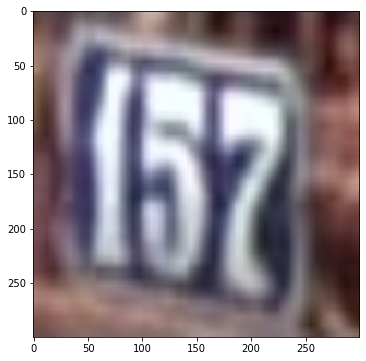

Epoch 2/20
100/100 [==============================] - 1268s 13s/step - loss: 6.0309 - val_loss: 5.9279

Epoch 00002: val_loss improved from 6.38755 to 5.92794, saving model to ./logs/ssd_20210330T1259_svhn_classes_10-02_loss-6.0309\_val_loss-5.9279.h5


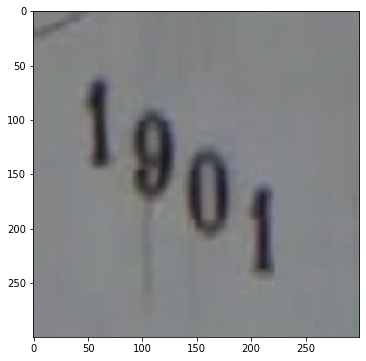

Epoch 3/20
100/100 [==============================] - 1263s 13s/step - loss: 5.6146 - val_loss: 5.3019

Epoch 00003: val_loss improved from 5.92794 to 5.30186, saving model to ./logs/ssd_20210330T1259_svhn_classes_10-03_loss-5.6146\_val_loss-5.3019.h5
class id: 1


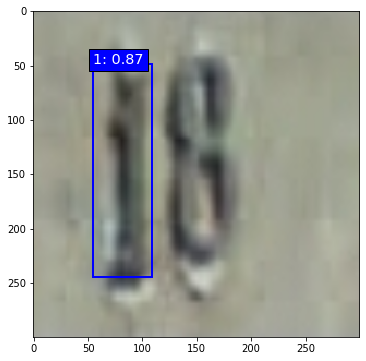

Epoch 4/20
100/100 [==============================] - 1273s 13s/step - loss: 5.0904 - val_loss: 4.9136

Epoch 00004: val_loss improved from 5.30186 to 4.91355, saving model to ./logs/ssd_20210330T1259_svhn_classes_10-04_loss-5.0904\_val_loss-4.9136.h5


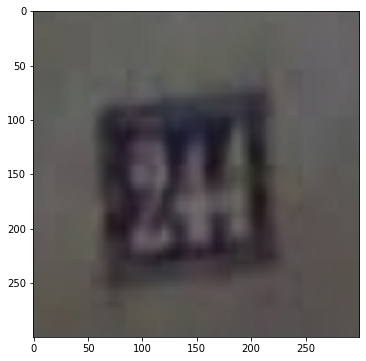

Epoch 5/20
100/100 [==============================] - 1859s 19s/step - loss: 4.5226 - val_loss: 4.3313

Epoch 00005: val_loss improved from 4.91355 to 4.33129, saving model to ./logs/ssd_20210330T1259_svhn_classes_10-05_loss-4.5226\_val_loss-4.3313.h5
class id: 1
class id: 8


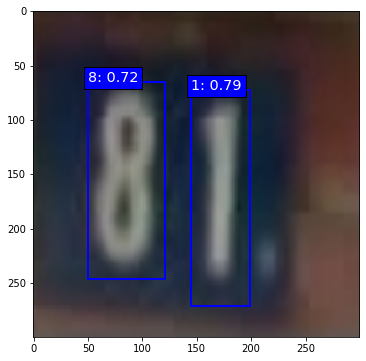

Epoch 6/20
 12/100 [==>...........................] - ETA: 27:21 - loss: 4.1590

In [ ]:
histroy = learner.train(train_generator, val_generator, steps=100,epochs=20)
# normal training should go from dozens to ~10 in 1 epoch
#some times the models stalls and then is released :o
# why the loss start with loss: 0.0039 

## Eval MAP (optional)

In [17]:
# cargar el modelo data generator desde utils_ssd
dataset_test = learner.prepare_ds(dataset_folder= data_folder,annotation_file=subset_annotation_file)


images_dir:  /home/predator/Documents/OCR/OCR/extra/ labels_filename:  /home/predator/Documents/OCR/OCR/extra/small_pascal.csv


In [18]:
# mostrar tamaño de dataset
print(f'loaded: {dataset_test.get_dataset_size() } images')

loaded: 20 images


In [19]:
# dataset load 
test_path = f'{data_folder}small_pascal.csv'
#load pd
load_testData = pd.read_csv(test_path)
load_testData.head()

,class_id,fname,xmax,xmin,ymax,ymin
0,2,343.png,70,16,113,11
1,2,343.png,126,71,117,15
2,7,343.png,171,125,118,16
3,3,435.png,51,19,91,25
4,6,435.png,87,58,81,15


In [20]:
 #print(len((load_testData)))
load_testData.shape

(49, 6)

In [27]:
from eval_utils.average_precision_evaluator import Evaluator

In [22]:
# setting and load the model

# carga y configura todo lo necesario para el modelo ssd300 weights
# finalmente retorna string de file-path
weights_destination_path=learner.init_weights()

#learner.get_model(mode='training', weights_path = weights_destination_path)


loading weights
classes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
last layer indicies [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253]
Shape of the 'conv4_3_norm_mbox_conf' weights:

kernel:	 (3, 3, 512, 44)
bias:	 (44,)


In [16]:
weights_destination_path = '/home/predator/Documents/OCR/OCR/trained/ssd_20210329T1033_svhn_classes_10-07_loss-3.8795_val_loss-3.8269.h5_subsampled_11_classes.h5'
learner.get_model(mode='training', weights_path = weights_destination_path)

Loading weights from /home/predator/Documents/OCR/OCR/trained/ssd_20210329T1033_svhn_classes_10-07_loss-3.8795_val_loss-3.8269.h5_subsampled_11_classes.h5


In [24]:

# evaluate map. may need some work
class_count = 10
#L ='./logs/ssd_20210329T1033_svhn_classes_10-01_loss-7.0665_val_loss-6.0914.h5'
ev = Evaluator(model=learner.model,
                      n_classes=class_count,
                      data_generator=dataset_test,
                      model_mode='training')
#test_dataset = test_generator
#ev = Evaluator(learner.model,class_count, test_dataset,model_mode='training' )
#map=ev(300,300,1,data_generator_mode='resize')
#map

In [27]:
map=ev(300,300,1,data_generator_mode='resize')
map

Number of images in the evaluation dataset: 20

Producing predictions batch-wise: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]
Matching predictions to ground truth, class 1/10.: 100%|██████████| 190/190 [00:00<00:00, 16461.16it/s]
Matching predictions to ground truth, class 2/10.: 100%|██████████| 68/68 [00:00<00:00, 18325.15it/s]
Matching predictions to ground truth, class 3/10.: 100%|██████████| 77/77 [00:00<00:00, 17570.39it/s]
Matching predictions to ground truth, class 4/10.: 100%|██████████| 70/70 [00:00<00:00, 18505.06it/s]
Matching predictions to ground truth, class 5/10.: 100%|██████████| 21/21 [00:00<00:00, 20059.30it/s]
Matching predictions to ground truth, class 6/10.: 100%|██████████| 25/25 [00:00<00:00, 15578.31it/s]
Matching predictions to ground truth, class 7/10.: 100%|██████████| 49/49 [00:00<00:00, 15290.60it/s]
Matching predictions to ground truth, class 8/10.: 100%|██████████| 27/27 [00:00<00:00, 17208.05it/s]
Matching predictions to ground truth, class 9/10.: 1

0.7233333333333333

In [55]:
results = ev(img_height=img_height,
                    img_width=img_width,
                    batch_size=8,
                    data_generator_mode='resize',
                    round_confidences=False,
                    matching_iou_threshold=0.5,
                    border_pixels='include',
                    sorting_algorithm='quicksort',
                    average_precision_mode='sample',
                    num_recall_points=11,
                    ignore_neutral_boxes=True,
                    return_precisions=True,
                    return_recalls=True,
                    return_average_precisions=True,
                    verbose=True)
#mean_average_precision, average_precisions, precisions, recalls = results

Number of images in the evaluation dataset: 20

Producing predictions batch-wise: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]
Matching predictions to ground truth, class 1/10.: 100%|██████████| 190/190 [00:00<00:00, 14432.99it/s]
Matching predictions to ground truth, class 2/10.: 100%|██████████| 68/68 [00:00<00:00, 12577.73it/s]
Matching predictions to ground truth, class 3/10.: 100%|██████████| 77/77 [00:00<00:00, 11204.60it/s]
Matching predictions to ground truth, class 4/10.: 100%|██████████| 70/70 [00:00<00:00, 12876.12it/s]
Matching predictions to ground truth, class 5/10.: 100%|██████████| 21/21 [00:00<00:00, 11415.29it/s]
Matching predictions to ground truth, class 6/10.: 100%|██████████| 25/25 [00:00<00:00, 12644.11it/s]
Matching predictions to ground truth, class 7/10.: 100%|██████████| 49/49 [00:00<00:00, 18980.50it/s]
Matching predictions to ground truth, class 8/10.: 100%|██████████| 27/27 [00:00<00:00, 15992.97it/s]
Matching predictions to ground truth, class 9/10.: 100

In [57]:
mean_average_precision, average_precisions, precisions, recalls = results
print(mean_average_precision, average)

0.7233333333333333 [0.0, 0.47272727272727266, 0.8181818181818182, 0.881818181818182, 0.36363636363636365, 1.0, 0.7272727272727273, 0.6666666666666667, 0.7575757575757577, 0.5454545454545454, 1.0]


## 4. Visualize the results

Let's take a look:


In [61]:
for i in range(1, len(average_precisions)):
    print("{:<14}{:<6}{}".format(learner.classes[i], 'AP', round(average_precisions[i], 3)))
print()
print("{:<14}{:<6}{}".format('','mAP', round(mean_average_precision, 3)))### 1.2. Load a trained model

#We set `model_mode` to 'inference' above, so the evaluator expects that you load a model that was built in 'inference' mode. If you're loading a model that was built in 'training' mode, change the `model_mode` parameter accordingly.

1             AP    0.473
2             AP    0.818
3             AP    0.882
4             AP    0.364
5             AP    1.0
6             AP    0.727
7             AP    0.667
8             AP    0.758
9             AP    0.545
10            AP    1.0

              mAP   0.723


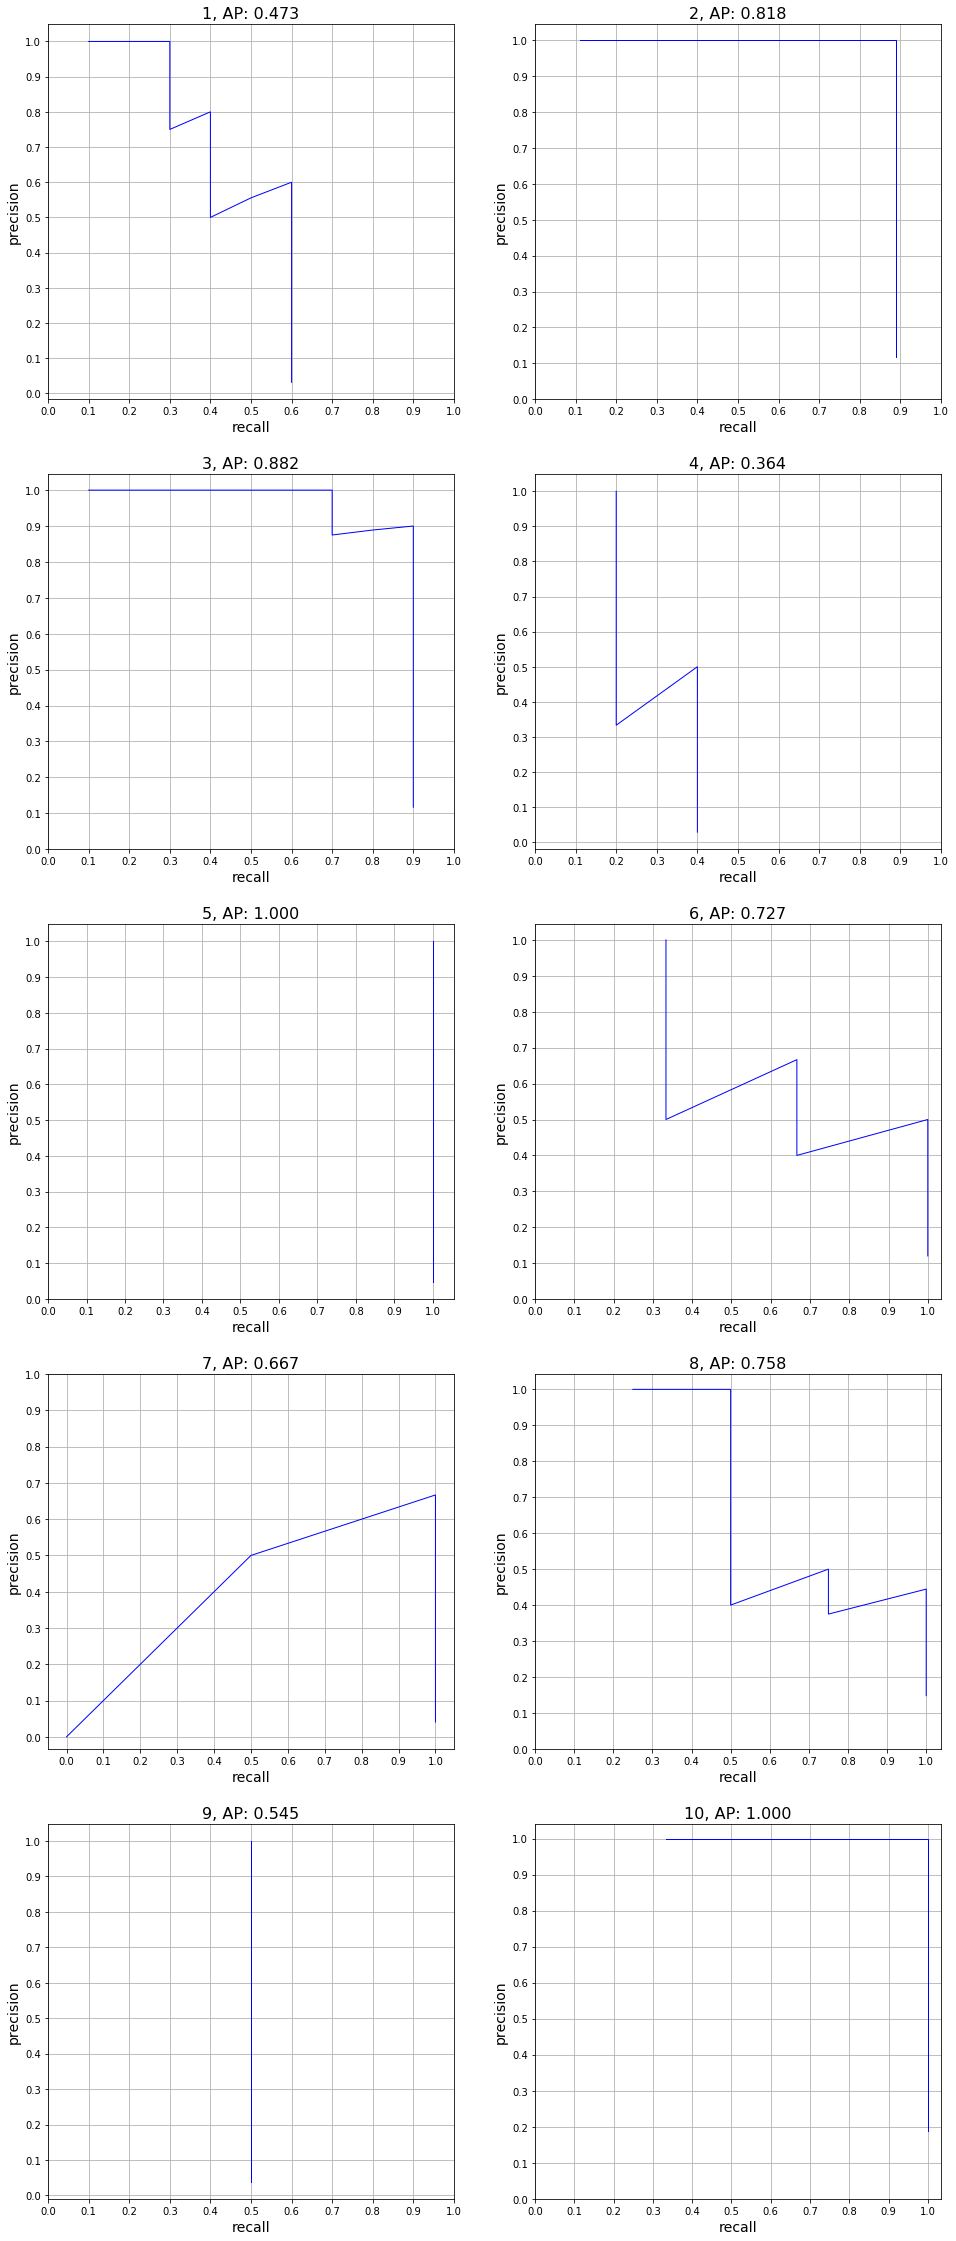

In [64]:
n_classes =class_count
classes = learner.classes
m = max((n_classes + 1) // 2, 2)
n = 2

fig, cells = plt.subplots(m, n, figsize=(n*8,m*8))
for i in range(m):
    for j in range(n):
        if n*i+j+1 > n_classes: break
        cells[i, j].plot(recalls[n*i+j+1], precisions[n*i+j+1], color='blue', linewidth=1.0)
        cells[i, j].set_xlabel('recall', fontsize=14)
        cells[i, j].set_ylabel('precision', fontsize=14)
        cells[i, j].grid(True)
        cells[i, j].set_xticks(np.linspace(0,1,11))
        cells[i, j].set_yticks(np.linspace(0,1,11))
        cells[i, j].set_title("{}, AP: {:.3f}".format(classes[n*i+j+1], average_precisions[n*i+j+1]), fontsize=16)

## test our data

In [17]:
# cargar el modelo data generator desde utils_ssd

data_test = '/home/predator/Documents/OCR/OCR/xml_data_test/'
subset_annotation_file = '/home/predator/Documents/OCR/OCR/xml_data_test/test.csv'
#print(data_folder)
dataset_test = learner.prepare_ds(dataset_folder= data_test,annotation_file=subset_annotation_file)

images_dir:  /home/predator/Documents/OCR/OCR/xml_data_test/ labels_filename:  /home/predator/Documents/OCR/OCR/xml_data_test/test.csv


In [18]:
test_generator = learner.get_generator_2(batch_size=4, trans=trans, anot_file=subset_annotation_file,dataset_test= data_test ,encoder=ssd_input_encoder)

images_dir:  /home/predator/Documents/OCR/OCR/xml_data_test/ labels_filename:  /home/predator/Documents/OCR/OCR/xml_data_test/test.csv
Loaded 4 images, with [<data_generator.object_detection_2d_geometric_ops.Resize object at 0x7f59a45989b0>] transformations


In [28]:
processed_images,encoded_labels = next(test_generator)
i = 0
# mostramos imagens
print('image :',processed_images[i])

#mostrasr el label
print('encoded Labels: ',encoded_labels[i])

image : [[[122 119 114 255]
  [122 119 114 255]
  [122 119 114 255]
  ...
  [159 151 148 255]
  [161 153 150 255]
  [161 153 150 255]]

 [[122 119 114 255]
  [122 119 114 255]
  [122 119 114 255]
  ...
  [159 151 148 255]
  [161 153 150 255]
  [161 153 150 255]]

 [[123 120 115 255]
  [123 120 115 255]
  [123 120 115 255]
  ...
  [159 151 148 255]
  [161 153 150 255]
  [161 153 150 255]]

 ...

 [[138 143 141 255]
  [138 142 141 255]
  [135 139 138 255]
  ...
  [186 191 185 255]
  [185 190 185 255]
  [184 189 183 255]]

 [[137 141 140 255]
  [137 141 140 255]
  [134 138 137 255]
  ...
  [186 191 185 255]
  [186 191 185 255]
  [185 190 184 255]]

 [[136 140 139 255]
  [137 141 140 255]
  [134 138 137 255]
  ...
  [186 191 185 255]
  [186 191 185 255]
  [185 190 184 255]]]
encoded Labels:  [[1.  0.  0.  ... 0.1 0.2 0.2]
 [1.  0.  0.  ... 0.1 0.2 0.2]
 [1.  0.  0.  ... 0.1 0.2 0.2]
 ...
 [1.  0.  0.  ... 0.1 0.2 0.2]
 [1.  0.  0.  ... 0.1 0.2 0.2]
 [1.  0.  0.  ... 0.1 0.2 0.2]]


In [29]:
y_pred = learner.model.predict(np.expand_dims(processed_images[0],0))

ValueError: Error when checking input: expected input_2 to have shape (300, 300, 3) but got array with shape (300, 300, 4)

In [128]:
#---------------------------------------------------------------

ValueError: not enough values to unpack (expected 5, got 2)

In [30]:
from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_patch_sampling_ops import RandomMaxCropFixedAR
from data_generator.object_detection_2d_geometric_ops import Resize




dataset = DataGenerator()

# TODO: Set the paths to your dataset here.
images_path = '/home/predator/Documents/OCR/OCR/xml_data_test/'
labels_path = '/home/predator/Documents/OCR/OCR/xml_data_test/test_1.csv'

dataset.parse_csv(images_dir=images_path,
                  labels_filename=labels_path,
                  
                  input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'], #['class_id', 'image_name',  'xmax',  'xmin', 'ymax', 'ymin' ], # This is the order of the first six columns in the CSV file that contains the labels for your dataset. If your labels are in XML format, maybe the XML parser will be helpful, check the documentation.
                  include_classes='all',
                  random_sample=False)

print("Number of images in the dataset:", dataset.get_dataset_size())


Number of images in the dataset: 2


In [31]:
img_height = 300 # Height of the input images
img_width = 300 # Width of the input images



convert_to_3_channels = ConvertTo3Channels()
random_max_crop = RandomMaxCropFixedAR(patch_aspect_ratio=img_width/img_height)
resize = Resize(height=img_height, width=img_width)

generator = dataset.generate(batch_size=1,
                             shuffle=True,
                             transformations=[convert_to_3_channels,
                                              random_max_crop,
                                              resize],
                             returns={'processed_images',
                                      'processed_labels',
                                      'filenames'},
                             keep_images_without_gt=False)

In [37]:

# Generate samples

batch_images, batch_labels, batch_filenames = next(generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(batch_labels[i])

print(batch_images[i])



Image: /home/predator/Documents/OCR/OCR/xml_data_test/1.png

Ground truth boxes:

[[  0   0 124 133 298]]
[[[135 127 124]
  [135 127 124]
  [135 127 124]
  ...
  [142 135 125]
  [142 135 125]
  [142 135 125]]

 [[135 127 124]
  [135 127 124]
  [135 127 124]
  ...
  [142 134 124]
  [142 134 124]
  [142 134 124]]

 [[134 126 123]
  [134 126 123]
  [135 127 124]
  ...
  [140 133 123]
  [140 133 123]
  [140 133 123]]

 ...

 [[155 159 158]
  [155 159 158]
  [155 159 158]
  ...
  [173 177 176]
  [173 177 176]
  [173 177 176]]

 [[155 159 158]
  [155 159 158]
  [155 159 158]
  ...
  [173 177 176]
  [173 177 176]
  [173 177 176]]

 [[155 159 158]
  [155 159 158]
  [155 159 158]
  ...
  [173 177 176]
  [173 177 176]
  [173 177 176]]]


In [38]:
y_pred = learner.model.predict(np.expand_dims(batch_images[i],0))
print(y_pred)

[[[9.7142470e-01 3.2184431e-03 2.8979334e-03 ... 1.0000000e-01
   2.0000000e-01 2.0000000e-01]
  [9.7066891e-01 3.2119392e-03 3.0440914e-03 ... 1.0000000e-01
   2.0000000e-01 2.0000000e-01]
  [9.7464401e-01 2.7657500e-03 2.5375232e-03 ... 1.0000000e-01
   2.0000000e-01 2.0000000e-01]
  ...
  [9.8066002e-01 1.2959848e-03 3.1176857e-03 ... 1.0000000e-01
   2.0000000e-01 2.0000000e-01]
  [9.8858207e-01 7.8322762e-04 9.2206540e-04 ... 1.0000000e-01
   2.0000000e-01 2.0000000e-01]
  [9.7939634e-01 7.0413610e-04 3.6412417e-03 ... 1.0000000e-01
   2.0000000e-01 2.0000000e-01]]]


In [39]:
y_pred_decoded = decode_detections(y_pred,
                                       confidence_thresh=0.5,
                                       iou_threshold=0.45,
                                       top_k=200,
                                       input_coords='centroids',
                                       normalize_coords=True,
                                       img_height=300,
                                       img_width=300)

print(y_pred_decoded[0])

[[  1.           0.67882007 183.13162923  70.16859949 231.17446303
  244.35939789]]


acc:  0.6788200736045837
xmin, ymin, xmax, ymax
183.13162922859192 70.16859948635101 231.17446303367615 244.3593978881836
class id: 1


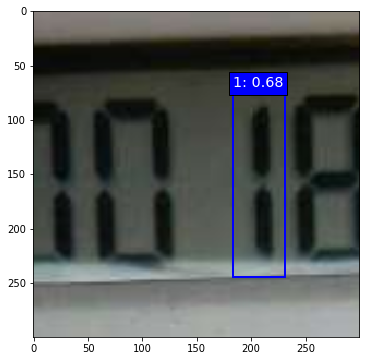

In [49]:
plt.figure(figsize=(6,6))
plt.imshow(batch_images[0])
current_axis = plt.gca()
for box in y_pred_decoded[0]:
    class_id = box[0]
    confidence = box[1]
    print('acc: ',confidence)
    xmin,ymin,xmax,ymax = box[2],box[3],box[4],box[5]
    print('xmin, ymin, xmax, ymax')
    print(xmin,ymin,xmax,ymax)
    print("class id:", learner.id2digit[class_id])
    label = '{}: {:.2f}'.format(learner.id2digit[class_id], confidence)
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='blue', fill=False, linewidth=2))
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'blue', 'alpha':1.0})
plt.show()

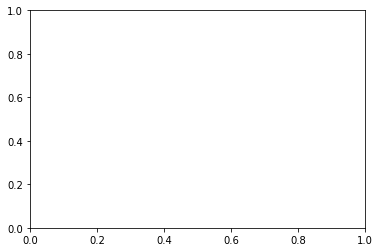

In [41]:
current_axis = plt.gca()

In [48]:
for box in y_pred_decoded[0]:
    class_id = box[0]
    confidence = box[1]
    print('acc: ',confidence)
    xmin,ymin,xmax,ymax = box[2],box[3],box[4],box[5]
    print('xmin, ymin, xmax, ymax')
    print(xmin,ymin,xmax,ymax)
    print("class id:", learner.id2digit[class_id])
    label = '{}: {:.2f}'.format(learner.id2digit[class_id], confidence)
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='blue', fill=False, linewidth=2))
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'blue', 'alpha':1.0})
plt.show()

acc:  0.6788200736045837
xmin, ymin, xmax, ymax
183.13162922859192 70.16859948635101 231.17446303367615 244.3593978881836
class id: 1


In [117]:

y_pred = learner.model.predict(batch_images)
print(y_pred)

[[[0.98 0.   0.   ... 0.1  0.2  0.2 ]
  [0.98 0.   0.   ... 0.1  0.2  0.2 ]
  [0.98 0.   0.   ... 0.1  0.2  0.2 ]
  ...
  [0.97 0.   0.   ... 0.1  0.2  0.2 ]
  [0.98 0.   0.   ... 0.1  0.2  0.2 ]
  [0.97 0.   0.01 ... 0.1  0.2  0.2 ]]]


In [119]:

# 4: Decode the raw predictions in `y_pred`.
normalize_coords = True
y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.4,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

In [122]:
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms
# 5: Convert the predictions for the original image.

y_pred_decoded_inv = apply_inverse_transforms(y_pred_decoded, batch_inverse_transforms)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded_inv[i])

NameError: name 'batch_inverse_transforms' is not defined

In [116]:
# Decode the raw prediction.

i = 0

confidence_threshold = 0.5

y_pred_thresh = [y_pred[k][y_pred[k,:,1] > confidence_threshold] for k in range(y_pred.shape[0])]

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('    class    conf  xmin    ymin    xmax    ymax')
print(y_pred_thresh[0])

Predicted boxes:

    class    conf  xmin    ymin    xmax    ymax
[]


In [23]:
# mostrar tamaño de dataset
print(f'loaded: {dataset_test.get_dataset_size() } images')

loaded: 4 images


In [28]:
# evaluate map. may need some work
class_count = 10
#L ='./logs/ssd_20210329T1033_svhn_classes_10-01_loss-7.0665_val_loss-6.0914.h5'
ev = Evaluator(model=learner.model,
                      n_classes=class_count,
                      data_generator=dataset_test,
                      model_mode='training')

In [29]:
map=ev(300,300,1,data_generator_mode='resize')
map

Number of images in the evaluation dataset: 4

Producing predictions batch-wise: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
Matching predictions to ground truth, class 1/10.: 100%|██████████| 89/89 [00:00<00:00, 15390.99it/s]
Matching predictions to ground truth, class 2/10.: 100%|██████████| 27/27 [00:00<00:00, 11513.44it/s]
Matching predictions to ground truth, class 3/10.: 100%|██████████| 14/14 [00:00<00:00, 12018.06it/s]
Matching predictions to ground truth, class 4/10.: 100%|██████████| 43/43 [00:00<00:00, 24631.94it/s]
Matching predictions to ground truth, class 5/10.: 100%|██████████| 1/1 [00:00<00:00, 1107.55it/s]
Matching predictions to ground truth, class 6/10.: 100%|██████████| 4/4 [00:00<00:00, 6662.91it/s]
Matching predictions to ground truth, class 7/10.: 100%|██████████| 35/35 [00:00<00:00, 24597.96it/s]
Matching predictions to ground truth, class 8/10.: 100%|██████████| 7/7 [00:00<00:00, 6179.78it/s]
Matching predictions to ground truth, class 9/10.: 100%|██████████

/home/predator/Documents/OCR/OCR/ssd_keras/eval_utils/average_precision_evaluator.py:772: RuntimeWarning: invalid value encountered in true_divide
  cumulative_recall = tp / self.num_gt_per_class[class_id] # 1D array with shape `(num_predictions,)`
/home/predator/Documents/OCR/OCR/ssd_keras/eval_utils/average_precision_evaluator.py:834: RuntimeWarning: invalid value encountered in greater_equal
  cum_prec_recall_greater_t = cumulative_precision[cumulative_recall >= t]


0.0

NameError: name 'results' is not defined